In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Imported required libraries

In [2]:
data = pd.read_csv('F:/ICT/python_programming/dataset_3/Add_sales_data_2018_CStudy3.csv')

Read our dataset and stored it in the variable data.

# Understanding our dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [4]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [5]:
data.shape

(205, 7)

In [6]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [7]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


(1)So we understood that we have 205 rows and 7 columns in our dataset.
(2)There is no null values in our dataset.
(3)Date have object data type and the rest of the columns are in float data type.

# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

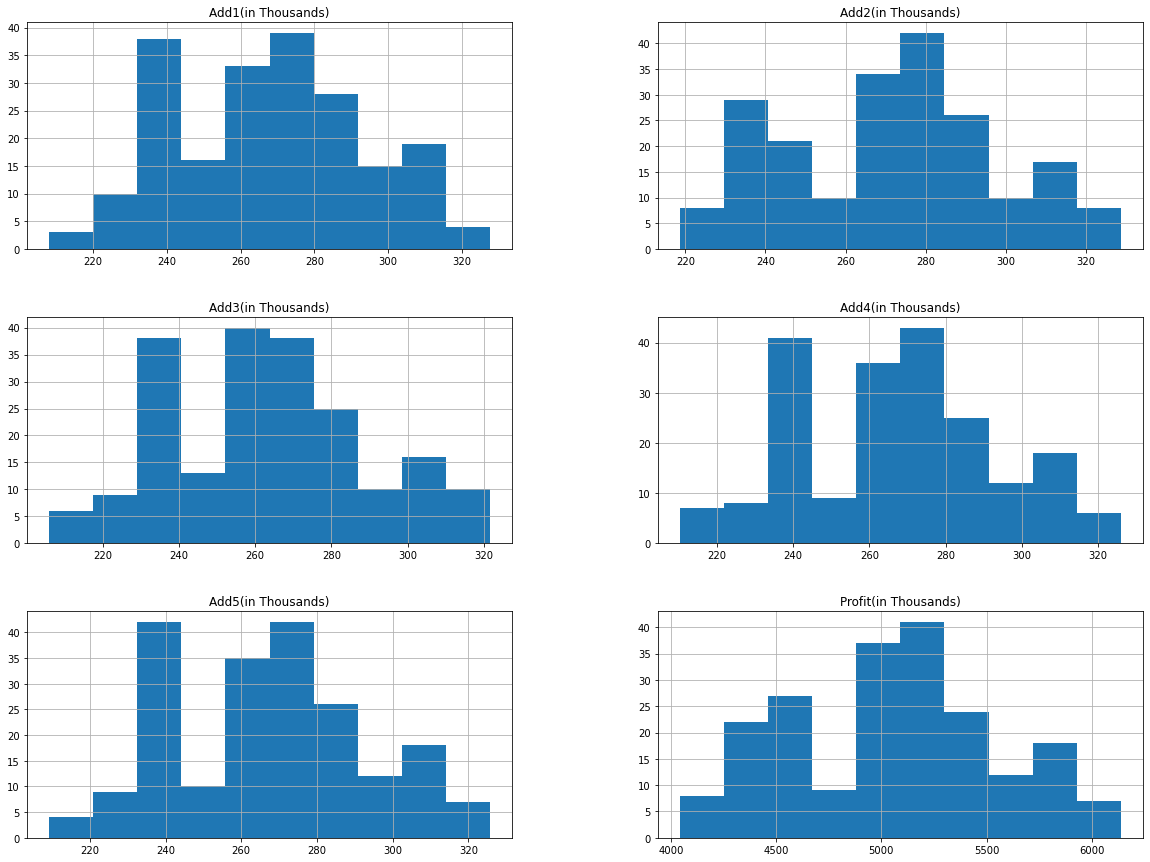

In [8]:
data.hist(figsize=(20,15))
plt.show()

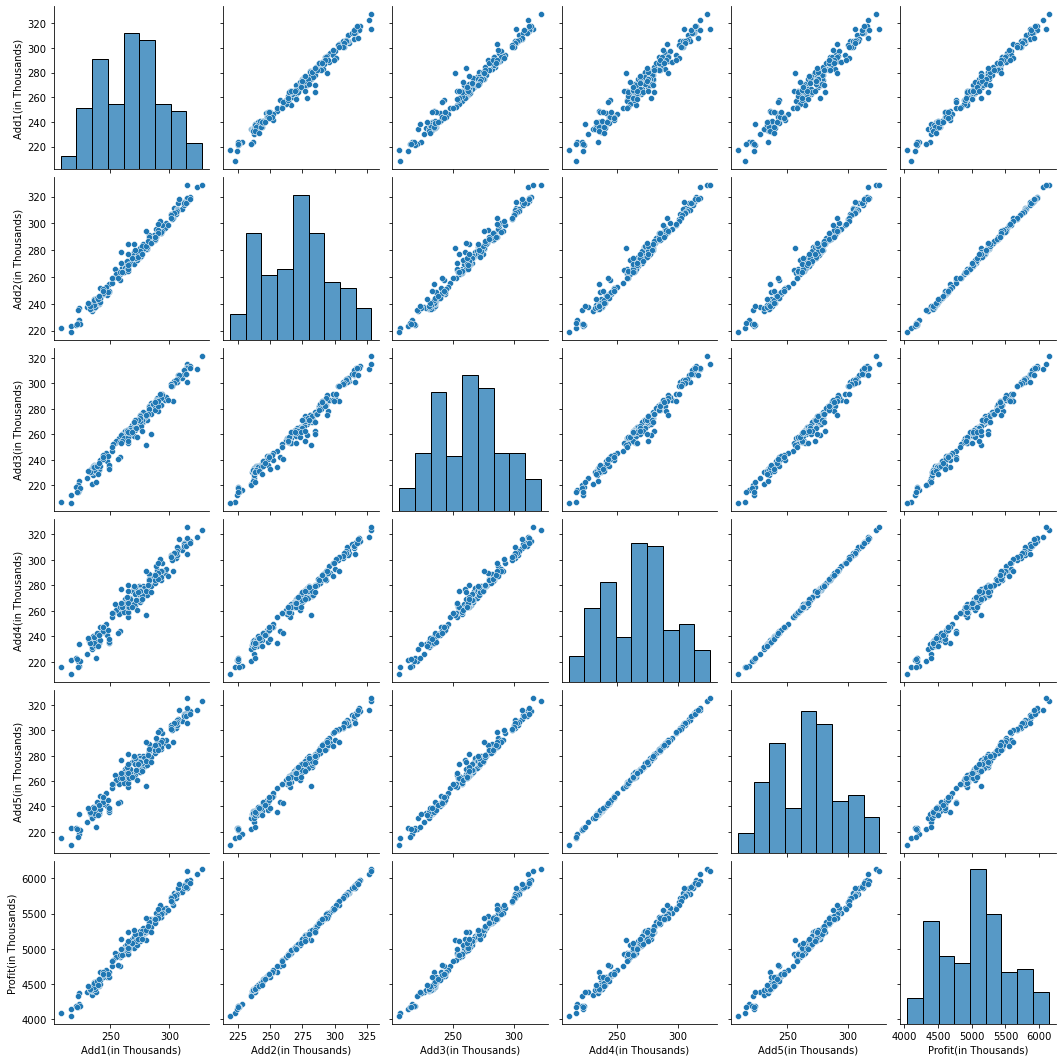

In [10]:
sns.pairplot(data)

In [ ]:
corrmatrix= data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-1,vmax=1,annot=True,linewidth=0.2,cmap='YlGnBu')

Using correlation function we can identify the correlation between the variables in the dataset.
From the above correlation matrix we can see that each variable is strongly positively correlated. 

There is a relationship between advertising and profit. for example From the pairplot we can identify that the amount we spent on advertising also increases the profit. So we can say that both are propotional and we can conclude that there is a positive correlation between each add and profit.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

Next we have to create a model to predict the profit

In [19]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [28]:
y = data['Profit(in Thousands)']
x = data.drop(['Profit(in Thousands)','Date'],axis=1)

In [29]:
x.shape

(205, 5)

In [30]:
y.shape

(205,)

we seperated profit from the dataset and stored it in the variable y. and the remaining data stored in the variable x.

To build a model we have to split the X and Y variables into training and testing.

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10,test_size=0.2)

In [66]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [67]:
model = lr.fit(x_train,y_train)

In [68]:
pred = model.predict(x_test)

In [69]:
print(y_test)

131    4968.030
117    5359.346
63     5250.775
56     4947.720
49     4643.716
60     5145.131
19     4193.095
171    5792.175
163    5267.657
203    5565.444
5      4404.686
173    5805.521
159    5384.175
114    5378.379
129    5140.372
101    5421.940
61     5088.455
116    5395.217
1      4042.448
2      4213.819
35     4419.421
10     4411.775
167    5465.277
178    6062.457
6      4418.709
75     5163.693
99     4772.520
20     4178.008
39     4506.279
102    5453.240
95     4623.793
154    5017.503
52     4494.144
58     5133.766
70     4977.891
68     5004.282
46     4558.651
103    5498.553
147    5175.051
76     5225.140
176    5858.340
Name: Profit(in Thousands), dtype: float64


In [70]:
print(pred)

[4968.03  5359.346 5250.775 4947.72  4643.716 5145.131 4193.095 5792.175
 5267.657 5565.444 4404.686 5805.521 5384.175 5378.379 5140.372 5421.94
 5088.455 5395.217 4042.448 4213.819 4419.421 4411.775 5465.277 6062.457
 4418.709 5163.693 4772.52  4178.008 4506.279 5453.24  4623.793 5017.503
 4494.144 5133.766 4977.891 5004.282 4558.651 5498.553 5175.051 5225.14
 5858.34 ]


In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
print('MSE is:',mean_squared_error(y_test,pred))

MSE is: 1.0339757656912846e-24


We have created a linear regression model to predict the profit from the given data. To build that we created a X and Y datas. Then we splitted our X and Y data set into training and testing in the ratio of 80:20 respectively. 
To increase the accuracy of our model we can use this method and take randome state as 10. And we got the Mean Squared Error as 1. From these we can conclude that the error between the actual and predicted output is 1.

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
Add1(in Thousands) =290
Add2(in Thousands) =312
Add3(in Thousands) =309
Add4(in Thousands) =298
Add5(in Thousands) =320


In [77]:
pred_check =[[290,312,309,298,320]]
model.predict(pred_check).item()

5820.0599999999995

By giving these input datas we got the aproximate profit